# Exercício de Regressão Linear

Coloque aqui o seu exercício de Regressão Linear discutido em classe, em particular o código de visualização do Espaço de Parâmetros durante o treinamento

Coloque outras coisas que você acha interessante como exercício didático.

In [1]:
print('Meu nome é: Raphael Voltoline Ramos')
print('Meu RA é: 153542')

Meu nome é: Raphael Voltoline Ramos
Meu RA é: 153542


Coloque o seu programa aqui neste notebook. No final salve os seus gráficos como imagens PNG:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

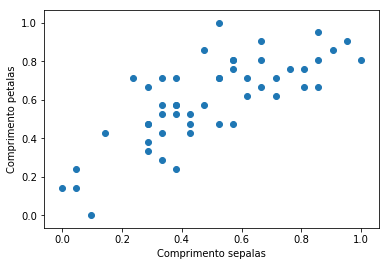

In [3]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x = data[:,0:1]
y = data[:,1:2]

x -= x.min()
x /= x.max()    # normalização
y -= y.min()
y /= y.max()

plt.scatter(x, y)
plt.xlabel('Comprimento sepalas')
plt.ylabel('Comprimento petalas')
plt.show()

In [4]:
def compute_cost(X_b, y, wT):
    '''
    Compute cost for linear regression
    (X,y): amostras rotuladas X(n_samples,2) e y(n_samples,)
    wT: vetor coluna de parâmetros (já transposto)
       aceita tanto shape (2,1) Para um caso como (2,n_history) para n_history casos
    '''
    e = X_b.dot(wT) - y
    J = (e * e).mean(axis=0)
    return J

In [5]:
def batch_gradient_descent(X, y, w_init, lr, n_epochs):
    '''
    Perform batch gradient descent to learn w
    by taking n_epochs gradient steps with learning
    rate lr
    Dados rotulados: X.shape:(M,2) e y.shape:(M,1)
    Parâmetro inicial: w_init.shape:(1,2)
    output: w_history:(num_epochs+1,2)
    '''
    M = y.size
    w_history = np.zeros((2,n_epochs+1))
    wT = w_init.T
    w_history[:,0] = wT[:,0]

    for i in range(n_epochs):
        wT = wT - lr * (2.0 / M) * (X.T).dot(X.dot(wT) - y)
        w_history[:,i+1]=wT[:,0]
    return w_history.T

In [6]:
# Parâmetros do gradiente descendente: número de iterações e taxa de aprendizagem
iterations = 100
lr = 0.1

n_samples = y.shape[0]

#Montagem da matriz X agora com os elementos 1 na primeira coluna
X_bias = np.hstack([np.ones(shape=(n_samples,1)), x])
w_init = np.zeros(shape=(1,2))

w_history = batch_gradient_descent(X_bias, y, w_init, lr, iterations)
#print(w_history)

w_gd = w_history[::-1][0:1] # pega o último valor do gradiente descendente
print('w_gd:\n', w_gd)
print('final cost (gradiente descendente):', compute_cost(X_bias, y, w_gd.T))

J_history = compute_cost(X_bias, y, w_history.T)
print(J_history[:10])

w_gd:
 [[ 0.34857359  0.51798724]]
final cost (gradiente descendente): [ 0.02286703]
[ 0.40907029  0.24348202  0.1505187   0.09829049  0.0689112   0.05234888
  0.04297685  0.03763921  0.03456589  0.03276406]


In [7]:
w_opt = (np.linalg.inv((X_bias.T).dot(X_bias)).dot(X_bias.T)).dot(y)
print(w_opt)
print('final cost (analítica):', compute_cost(X_bias, y, w_opt))

[[ 0.26134159]
 [ 0.68646976]]
final cost (analítica): [ 0.02116942]


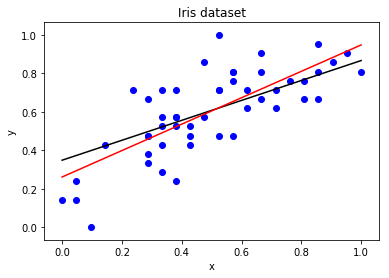

In [8]:
plt.scatter(x, y, marker='o', c='b')
plt.title('Iris dataset')
plt.xlabel('x')
plt.ylabel('y')

# Plotagem da reta utilizando os parâmetros ótimos encontrados no gradiente descendente

X_all = np.linspace(x.min(),x.max(),100).reshape(100,1)
X_all_bias = np.hstack([np.ones((100,1)),X_all])
result = X_all_bias.dot(w_gd.T)  # Predição via minimização gradiente descendente
plt.plot(X_all, result, c='k')
result_opt = X_all_bias.dot(w_opt)  # Predição do valor analítico
plt.plot(X_all, result_opt,c='r')
plt.show()

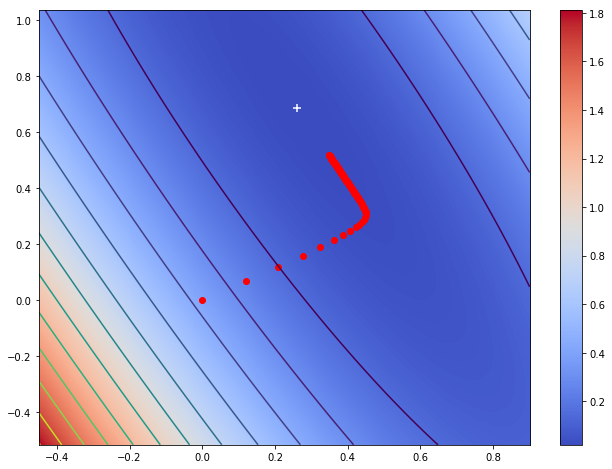

In [119]:
def JView(x, y, w_history, w_opt = []):
    img_width = 500
    img_height = 500
    
    #recupera os minimos e maximos de cada atributo
    x_axix_w0_min = w_history[:,0].min()
    x_axix_w0_max = w_history[:,0].max()
    y_axis_w1_min = w_history[:,1].min()
    y_axis_w1_max = w_history[:,1].max()
    
    #calcula um 'padding' a ser adicionada aos eixos 
    x_axis_pad = abs(x_axix_w0_max - x_axix_w0_min)
    y_axis_pad = abs(y_axis_w1_max - y_axis_w1_min)
    
    #calcula o inicio e fim de cada eixo (x e y)
    x_axis_ini = x_axix_w0_min - x_axis_pad
    x_axis_end = x_axix_w0_max + x_axis_pad
    y_axis_ini = y_axis_w1_min - y_axis_pad
    y_axis_end = y_axis_w1_max + y_axis_pad
    
    #cria um array de atributos para cada eixo
    x_axis = np.linspace(x_axis_ini, x_axis_end, img_width)
    y_axis = np.linspace(y_axis_ini, y_axis_end, img_height)[::-1]
    
    #cria grids com os atributos calculados
    x_axis, y_axis = np.meshgrid(x_axis, y_axis)
    
    #combina as grids criadas afim de obter um matriz [img_width * img_height, 2]
    #essa matriz contem todas os pares de atributos [w0, w1] da imagem de custo
    W = np.hstack([x_axis.reshape(img_width * img_height, 1), y_axis.reshape(img_width * img_height, 1)])
    
    #calcula o custo de todas os pares de atributos criados e cria a imagem de custo com as dimensões adequadas
    e = W.dot(x.T) - y.T
    img = (e * e).mean(axis=1).reshape(img_height, img_width)
 
    #verifica se os atributos [w0, w1] otimos não foram passados
    #caso afirmativo, tenta encontra-los a partir dos custos ja calculados
    if(np.size(w_opt) == 0):
        index_min = np.unravel_index(img.argmin(), img.shape)
        w_opt = np.array([x_axis[index_min], y_axis[index_min]])
    
    #configura e mostra a figura final
    fig = plt.figure(figsize=(11, 8))
    plt.contour(x_axis, y_axis, img, 15)
    plt.imshow(img,
               interpolation = 'nearest',
               aspect='auto',
               cmap = plt.cm.coolwarm,
               extent = (x_axis_ini, x_axis_end, y_axis_ini, y_axis_end))
    plt.colorbar()
    plt.scatter(w_history[:,0], w_history[:,1], c='r')
    plt.scatter(w_opt[0], w_opt[1], marker='+', c='w', s=60)
    plt.show()
    
    #salva a figura
    fig.savefig('fig_custo_2d.png')
    
    
JView(X_bias, y, w_history, w_opt)

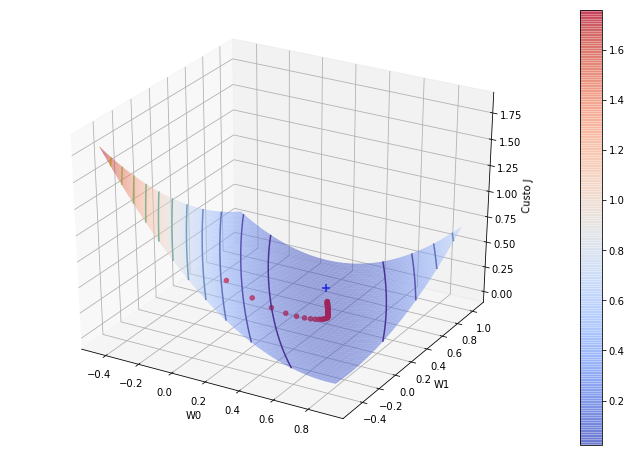

In [117]:
def JView3D(x, y, w_history, w_opt = []):
    from mpl_toolkits.mplot3d import Axes3D
    
    img_width = 500
    img_height = 500
    
    #recupera os minimos e maximos de cada atributo
    x_axix_w0_min = w_history[:,0].min()
    x_axix_w0_max = w_history[:,0].max()
    y_axis_w1_min = w_history[:,1].min()
    y_axis_w1_max = w_history[:,1].max()
    
    #calcula um 'padding' a ser adicionada aos eixos 
    x_axis_pad = abs(x_axix_w0_max - x_axix_w0_min)
    y_axis_pad = abs(y_axis_w1_max - y_axis_w1_min)
    
    #calcula o inicio e fim de cada eixo (x e y)
    x_axis_ini = x_axix_w0_min - x_axis_pad
    x_axis_end = x_axix_w0_max + x_axis_pad
    y_axis_ini = y_axis_w1_min - y_axis_pad
    y_axis_end = y_axis_w1_max + y_axis_pad
    
    #cria um array de atributos para cada eixo
    x_axis = np.linspace(x_axis_ini, x_axis_end, img_width)
    y_axis = np.linspace(y_axis_ini, y_axis_end, img_height)[::-1]
    
    #cria grids com os atributos calculados
    x_axis, y_axis = np.meshgrid(x_axis, y_axis)
    
    #combina as grids criadas afim de obter um matriz [img_width * img_height, 2]
    #essa matriz contem todas os pares de atributos [w0, w1] da imagem de custo
    W = np.hstack([x_axis.reshape(img_width * img_height, 1), y_axis.reshape(img_width * img_height, 1)])
    
    #calcula o custo de todas os pares de atributos criados e cria a imagem de custo com as dimensões adequadas
    e = W.dot(x.T) - y.T
    img = (e * e).mean(axis=1).reshape(img_height, img_width)
    
    #calcula o custo dos atributos armazenados no historico
    e = w_history.dot(x.T) - y.T
    w_history_j = (e * e).mean(axis=1)

    #verifica se os atributos [w0, w1] otimos não foram passados
    #caso afirmativo, tenta encontra-los a partir dos custos ja calculados
    if(np.size(w_opt) == 0):
        index_min = np.unravel_index(img.argmin(), img.shape)
        w_opt = np.array([x_axis[index_min], y_axis[index_min]])
    
    #calcula o custo dos atributos otimos
    e = w_opt.reshape(1,2).dot(x.T) - y.T
    w_opt_j = (e * e).mean(axis=1)

    #configura e mostra a figura final
    fig = plt.figure( figsize=(12, 8))
    ax = fig.gca(projection = '3d')      
    surf = ax.plot_surface(x_axis, y_axis, img,
                           cmap = plt.cm.coolwarm,
                           linewidth = 0,
                           alpha=0.5)
        
    ax.scatter(w_history[:,0], w_history[:,1], w_history_j, c='r')
    ax.scatter(w_opt[0], w_opt[1], w_opt_j, marker='+', c='b', s=60)
    ax.contour(x_axis, y_axis, img, 15)
    ax.set_xlabel('W0')
    ax.set_ylabel('W1')
    ax.set_zlabel('Custo J')
    fig.colorbar(surf)
    plt.show()
    
    #salva a figura final
    fig.savefig('fig_custo_3d.png')
    
    
JView3D(X_bias, y, w_history, w_opt)

## Testando se o arquivo foi criado e pode ser lido

In [110]:
%ls -l

 O volume na unidade C ‚ OS
 O N£mero de S‚rie do Volume ‚ 5423-A27D

 Pasta de C:\Users\Rapha\Documents\ia368Z\github\ia368Z\atividades\week2



Arquivo nÆo encontrado


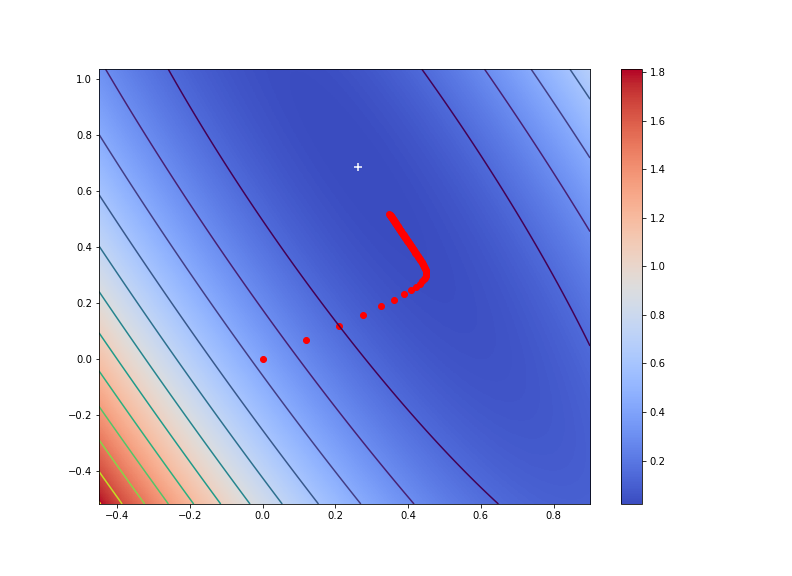

In [109]:
import IPython
img = IPython.display.Image(filename='fig_custo_2d.png')
img

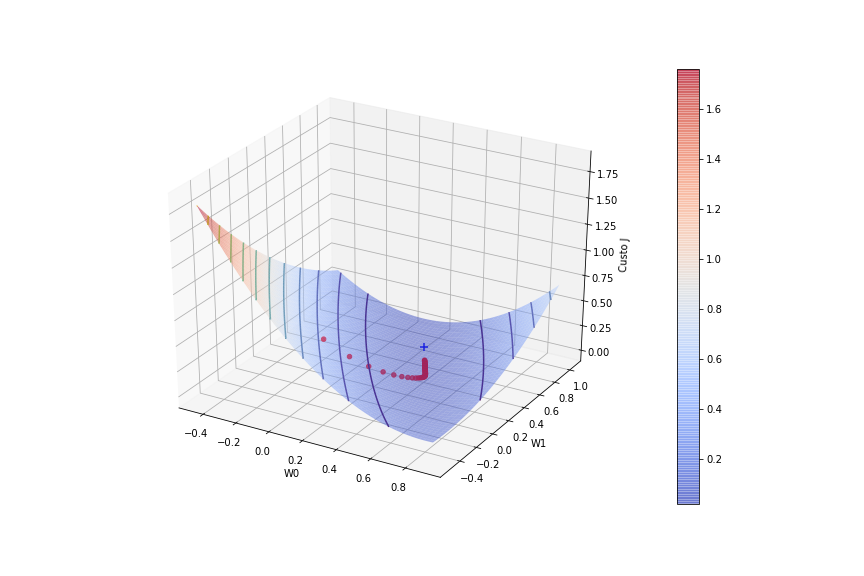

In [108]:
img = IPython.display.Image(filename='fig_custo_3d.png')
img